### Import modules and Load data

In [42]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers

In [17]:
AI_IMAGE_DIR = "data/AiArtData/AiArtData"
REAL_IMAGE_DIR = "data/RealArt/RealArt"

In [18]:
ai_image_filenames = list(os.walk(AI_IMAGE_DIR))[0][2]
real_image_filenames = list(os.walk(REAL_IMAGE_DIR))[0][2]

### Explore dataset

In [25]:
sample_ai = plt.imread(os.path.join(AI_IMAGE_DIR, ai_image_filenames[0]))
sample_real = plt.imread(os.path.join(REAL_IMAGE_DIR, real_image_filenames[1]))

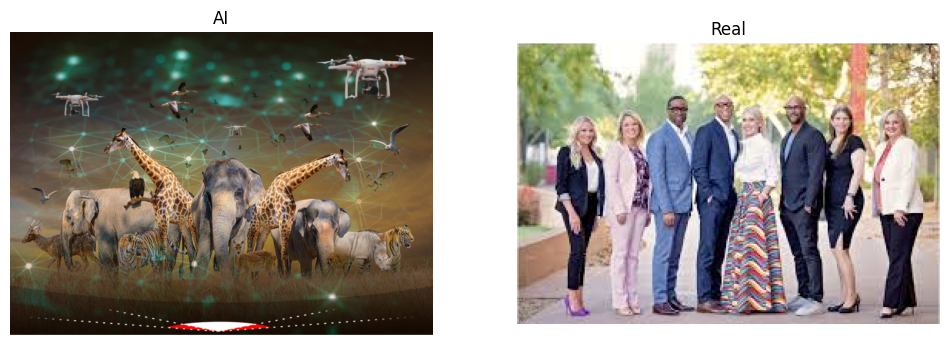

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

axes[0].imshow(sample_ai)
axes[1].imshow(sample_real)

axes[0].set_title('AI')
axes[1].set_title('Real')

axes[0].axis('off')
axes[1].axis('off')

plt.show()

In [39]:
num_ai = len(ai_image_filenames)
num_real = len(real_image_filenames)
print(f"There are {num_ai} ai images and {num_real} real images")
print(f"It is {round(num_ai/(num_ai+num_real), 2)}% AI generated.")

There are 539 ai images and 436 real images
It is 0.55% AI generated.


### Augment Image dataset

In [47]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])